In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [30]:
Fraud_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/Fraud_check.csv')
Fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [31]:
Fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [32]:
Fraud_df.isnull().value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
False      False           False           False            False            False    600
dtype: int64

In [33]:
Fraud_df.describe

<bound method NDFrame.describe of     Undergrad Marital.Status  ...  Work.Experience  Urban
0          NO         Single  ...               10    YES
1         YES       Divorced  ...               18    YES
2          NO        Married  ...               30    YES
3         YES         Single  ...               15    YES
4          NO        Married  ...               28     NO
..        ...            ...  ...              ...    ...
595       YES       Divorced  ...                7    YES
596       YES       Divorced  ...                2    YES
597        NO       Divorced  ...                0    YES
598       YES        Married  ...               17     NO
599        NO       Divorced  ...               16     NO

[600 rows x 6 columns]>

In [34]:
#Changing the categorical variables into dummies.
df = pd.get_dummies(Fraud_df)

#Converting the Target variable i.e. Taxable Income into Categorical (As mentioned in the problem statement)
df['Category'] = pd.cut(df['Taxable.Income'], 
                        bins=[0,30000, np.inf], 
                        labels=['Risky','Good'],
                        include_lowest=True)

In [35]:
Fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [36]:
x = df.iloc[:,1:10]
y = df.iloc[:,10]

In [37]:
print(x,y)

     City.Population  Work.Experience  ...  Urban_NO  Urban_YES
0              50047               10  ...         0          1
1             134075               18  ...         0          1
2             160205               30  ...         0          1
3             193264               15  ...         0          1
4              27533               28  ...         1          0
..               ...              ...  ...       ...        ...
595            39492                7  ...         0          1
596            55369                2  ...         0          1
597           154058                0  ...         0          1
598           180083               17  ...         1          0
599           158137               16  ...         1          0

[600 rows x 9 columns] 0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Category, Length: 600, dtype: category
Categories (2, object): ['Risky

In [38]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [39]:
x_train.value_counts()

City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  Urban_NO  Urban_YES
199778           27               0             1              0                        1                       0                      1         0            1
85832            15               1             0              0                        0                       1                      0         1            1
76718            10               0             1              0                        0                       1                      0         1            1
77059            22               0             1              1                        0                       0                      1         0            1
77102            1                0             1              0                        0                       1                      0         1            1
                                             

In [40]:
y_train.value_counts()

Good     336
Risky     84
Name: Category, dtype: int64

In [41]:
x_test.value_counts()

City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  Urban_NO  Urban_YES
199174           10               1             0              1                        0                       0                      1         0            1
82565            12               1             0              1                        0                       0                      1         0            1
79653            15               0             1              0                        1                       0                      0         1            1
78897            11               0             1              0                        0                       1                      0         1            1
77256            29               0             1              0                        0                       1                      1         0            1
                                             

In [42]:
y_test.value_counts()

Good     140
Risky     40
Name: Category, dtype: int64

#Building Decision tree classifier using Entropy crieteria

IT-1, Depth-2

In [43]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model1.fit(x_train,y_train)
preds1 = model1.predict(x_test) # predicting on test data set 

print('Model leaves:',model1.get_n_leaves(),'\n','\n',
      pd.Series(preds1).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds1==y_test))

Model leaves: 4 
 
 Good    180
dtype: int64 
 
 Model Accuracy is: 0.7777777777777778


IT-2, Depth=3

In [44]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)
preds2 = model2.predict(x_test) # predicting on test data set 

print('Model leaves:',model2.get_n_leaves(),'\n','\n',
      pd.Series(preds2).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds2==y_test))

Model leaves: 7 
 
 Good     179
Risky      1
dtype: int64 
 
 Model Accuracy is: 0.7722222222222223


IT-3, Depth=4

In [45]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model3.fit(x_train,y_train)
preds3 = model3.predict(x_test) # predicting on test data set 

print('Model leaves:',model3.get_n_leaves(),'\n','\n',
      pd.Series(preds3).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds3==y_test))

Model leaves: 10 
 
 Good     177
Risky      3
dtype: int64 
 
 Model Accuracy is: 0.7611111111111111


IT-4, depth=5

In [46]:

model4 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model4.fit(x_train,y_train)
preds4 = model4.predict(x_test) # predicting on test data set 

print('Model leaves:',model4.get_n_leaves(),'\n','\n',
      pd.Series(preds4).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds4==y_test))

Model leaves: 15 
 
 Good     178
Risky      2
dtype: int64 
 
 Model Accuracy is: 0.7666666666666667


IT-5,depth=6

In [47]:
model5=DecisionTreeClassifier(criterion='entropy',max_depth=6)
model5.fit(x_train,y_train)
preds5=model4.predict(x_test)

print('Model leaves:',model5.get_n_leaves(),'\n','\n',
      pd.Series(preds5).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds5==y_test))

Model leaves: 20 
 
 Good     178
Risky      2
dtype: int64 
 
 Model Accuracy is: 0.7666666666666667


The classifier model at the end of iteration 1 has the max accuracy i.e. 77.77%, hence we will take this as our final model


In [48]:
print(classification_report(preds1,y_test))

              precision    recall  f1-score   support

        Good       1.00      0.78      0.88       180
       Risky       0.00      0.00      0.00         0

    accuracy                           0.78       180
   macro avg       0.50      0.39      0.44       180
weighted avg       1.00      0.78      0.88       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Lets see if we can perform some EDA to improve the accuracy 

In [49]:
from sklearn.ensemble import IsolationForest

In [54]:
newdf= pd.get_dummies(Fraud_df)

In [53]:
newdf

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [55]:
# training the model
clf = IsolationForest(random_state=40,contamination=.01)
clf.fit(newdf)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=40, verbose=0, warm_start=False)

In [56]:
# predictions
y_pred_outliers = clf.predict(newdf)

In [57]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [58]:
newdf['scores']=clf.decision_function(newdf.iloc[:,0:10])
newdf['anomaly']=clf.predict(newdf.iloc[:,0:10])
newdf

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly
0,68833,50047,10,1,0,0,0,1,0,1,0.069338,1
1,33700,134075,18,0,1,1,0,0,0,1,0.066812,1
2,36925,160205,30,1,0,0,1,0,0,1,0.013044,1
3,50190,193264,15,0,1,0,0,1,0,1,0.071797,1
4,81002,27533,28,1,0,0,1,0,1,0,0.036757,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0.052993,1
596,69967,55369,2,0,1,1,0,0,0,1,0.058169,1
597,47334,154058,0,1,0,1,0,0,0,1,0.028606,1
598,98592,180083,17,0,1,0,1,0,1,0,0.008382,1


In [59]:
#Print the outlier data points
newdf[newdf['anomaly']==-1]

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly
34,12514,183767,1,0,1,1,0,0,0,1,-0.006613,-1
280,17783,33184,1,1,0,1,0,0,1,0,-0.011445,-1
409,83094,163058,1,1,0,0,0,1,1,0,-0.000517,-1
414,97980,27300,1,1,0,1,0,0,0,1,-0.006566,-1
474,99128,80729,0,0,1,1,0,0,1,0,-0.004241,-1
541,12453,191874,30,0,1,1,0,0,0,1,-0.004687,-1


In [60]:
df1 = newdf.drop([34,280,409,414,474,541],axis=0).reset_index(drop=True)
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly
0,68833,50047,10,1,0,0,0,1,0,1,0.069338,1
1,33700,134075,18,0,1,1,0,0,0,1,0.066812,1
2,36925,160205,30,1,0,0,1,0,0,1,0.013044,1
3,50190,193264,15,0,1,0,0,1,0,1,0.071797,1
4,81002,27533,28,1,0,0,1,0,1,0,0.036757,1
...,...,...,...,...,...,...,...,...,...,...,...,...
589,76340,39492,7,0,1,1,0,0,0,1,0.052993,1
590,69967,55369,2,0,1,1,0,0,0,1,0.058169,1
591,47334,154058,0,1,0,1,0,0,0,1,0.028606,1
592,98592,180083,17,0,1,0,1,0,1,0,0.008382,1


In [61]:
#Converting the Target variable i.e. Taxable Income into Categorical (As mentioned in the problem statement)
df1['Category'] = pd.cut(df1['Taxable.Income'], 
                        bins=[0,30000, np.inf], 
                        labels=['Risky','Good'],
                        include_lowest=True)

df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly,Category
0,68833,50047,10,1,0,0,0,1,0,1,0.069338,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,0.066812,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,0.013044,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,0.071797,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,0.036757,1,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,76340,39492,7,0,1,1,0,0,0,1,0.052993,1,Good
590,69967,55369,2,0,1,1,0,0,0,1,0.058169,1,Good
591,47334,154058,0,1,0,1,0,0,0,1,0.028606,1,Good
592,98592,180083,17,0,1,0,1,0,1,0,0.008382,1,Good


In [62]:
x1 = df1.iloc[:,1:10]
y1 = df1.iloc[:,12]

In [63]:
print(x1,y1)

     City.Population  Work.Experience  ...  Urban_NO  Urban_YES
0              50047               10  ...         0          1
1             134075               18  ...         0          1
2             160205               30  ...         0          1
3             193264               15  ...         0          1
4              27533               28  ...         1          0
..               ...              ...  ...       ...        ...
589            39492                7  ...         0          1
590            55369                2  ...         0          1
591           154058                0  ...         0          1
592           180083               17  ...         1          0
593           158137               16  ...         1          0

[594 rows x 9 columns] 0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
589    Good
590    Good
591    Good
592    Good
593    Good
Name: Category, Length: 594, dtype: category
Categories (2, object): ['Risky

In [64]:
# Splitting data into training and testing data set
x_train1, x_test1,y_train1,y_test1 = train_test_split(x1,y1, test_size=0.25,random_state=40)

#As we have seen in iteration 1 yields the maximum accuracy with maximum depth of 2

In [67]:
model11 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model11.fit(x_train1,y_train1)
preds11 = model11.predict(x_test1) # predicting on test data set 

print('Model leaves:',model11.get_n_leaves(),'\n','\n',
      pd.Series(preds11).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds11==y_test1))

Model leaves: 3 
 
 Good    149
dtype: int64 
 
 Model Accuracy is: 0.825503355704698


#As we can the model Accuracy has been increased to 82.55%

#Building Decision Tree Classifier (CART) using Gini Criteria

In [68]:

from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [73]:
model_gini.fit(x_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
#Prediction and computing the accuracy
predG=model_gini.predict(x_test1)
print('Model Accuracy is:',np.mean(predG==y_test1))

Model Accuracy is: 0.825503355704698


#Let's Visualize both the Decision Trees

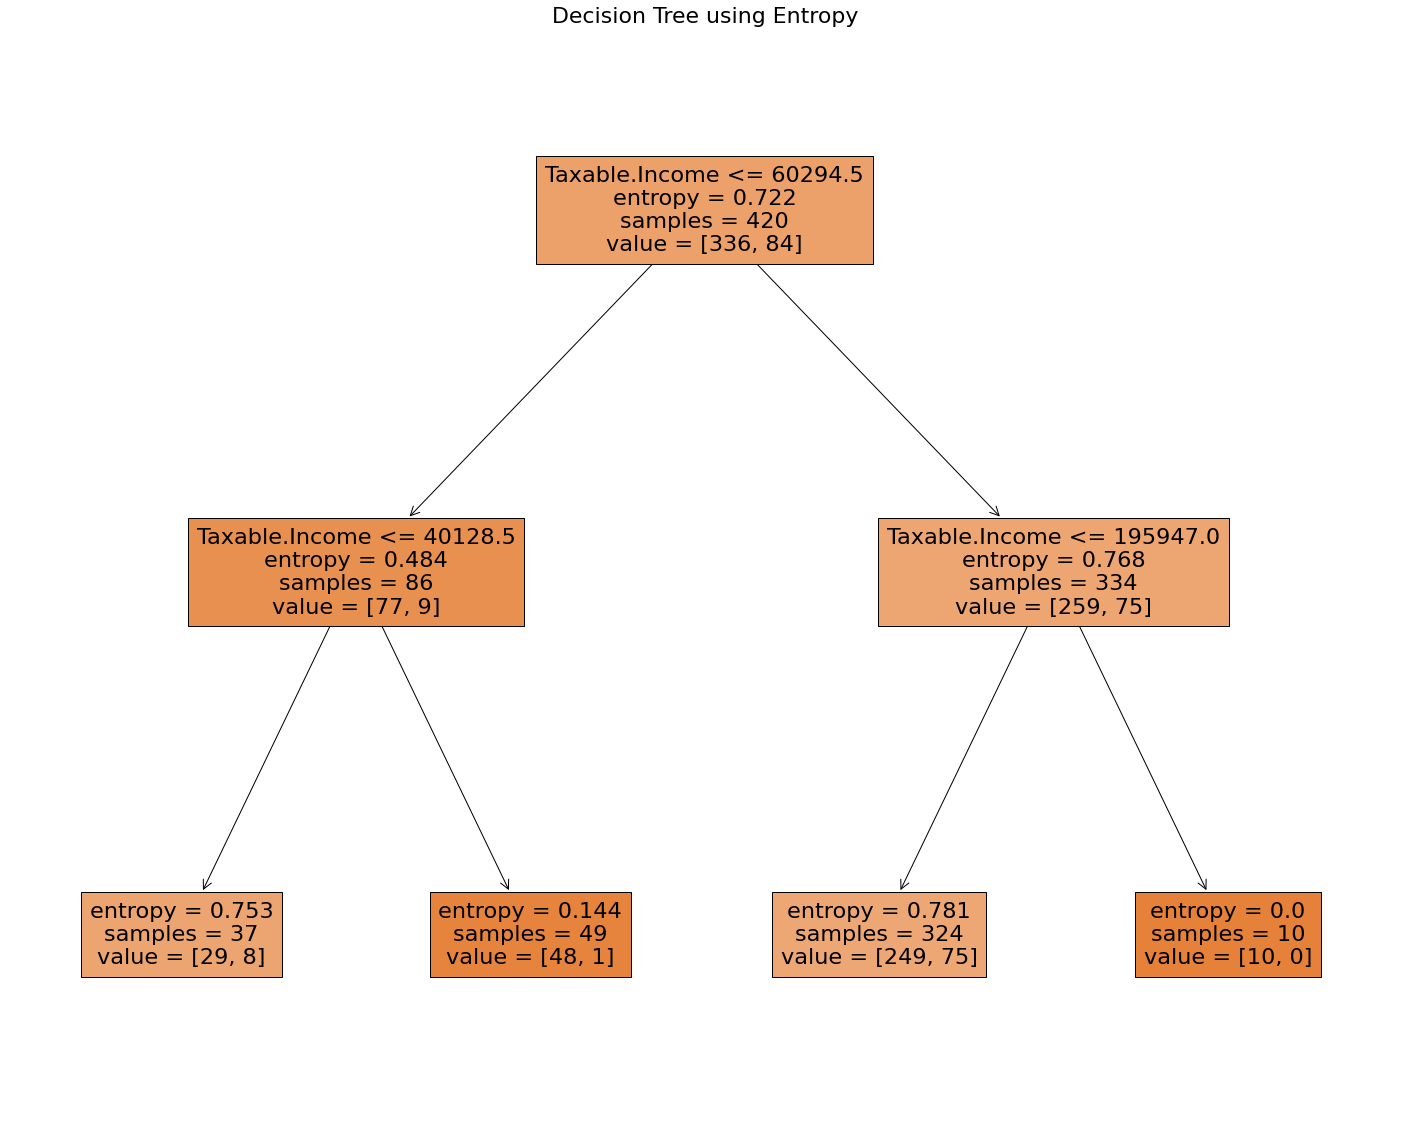

In [76]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model1,
                     feature_names= ['Taxable.Income','City.Population','Work.Experience','Undergrad_NO',
                                     'Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married',
                                     'Marital.Status_Single','Urban_NO','Urban_YES','Category'], filled=True)
plt.title('Decision Tree using Entropy',fontsize=22)
plt.savefig('Fraud Check DT_Entropy.png')

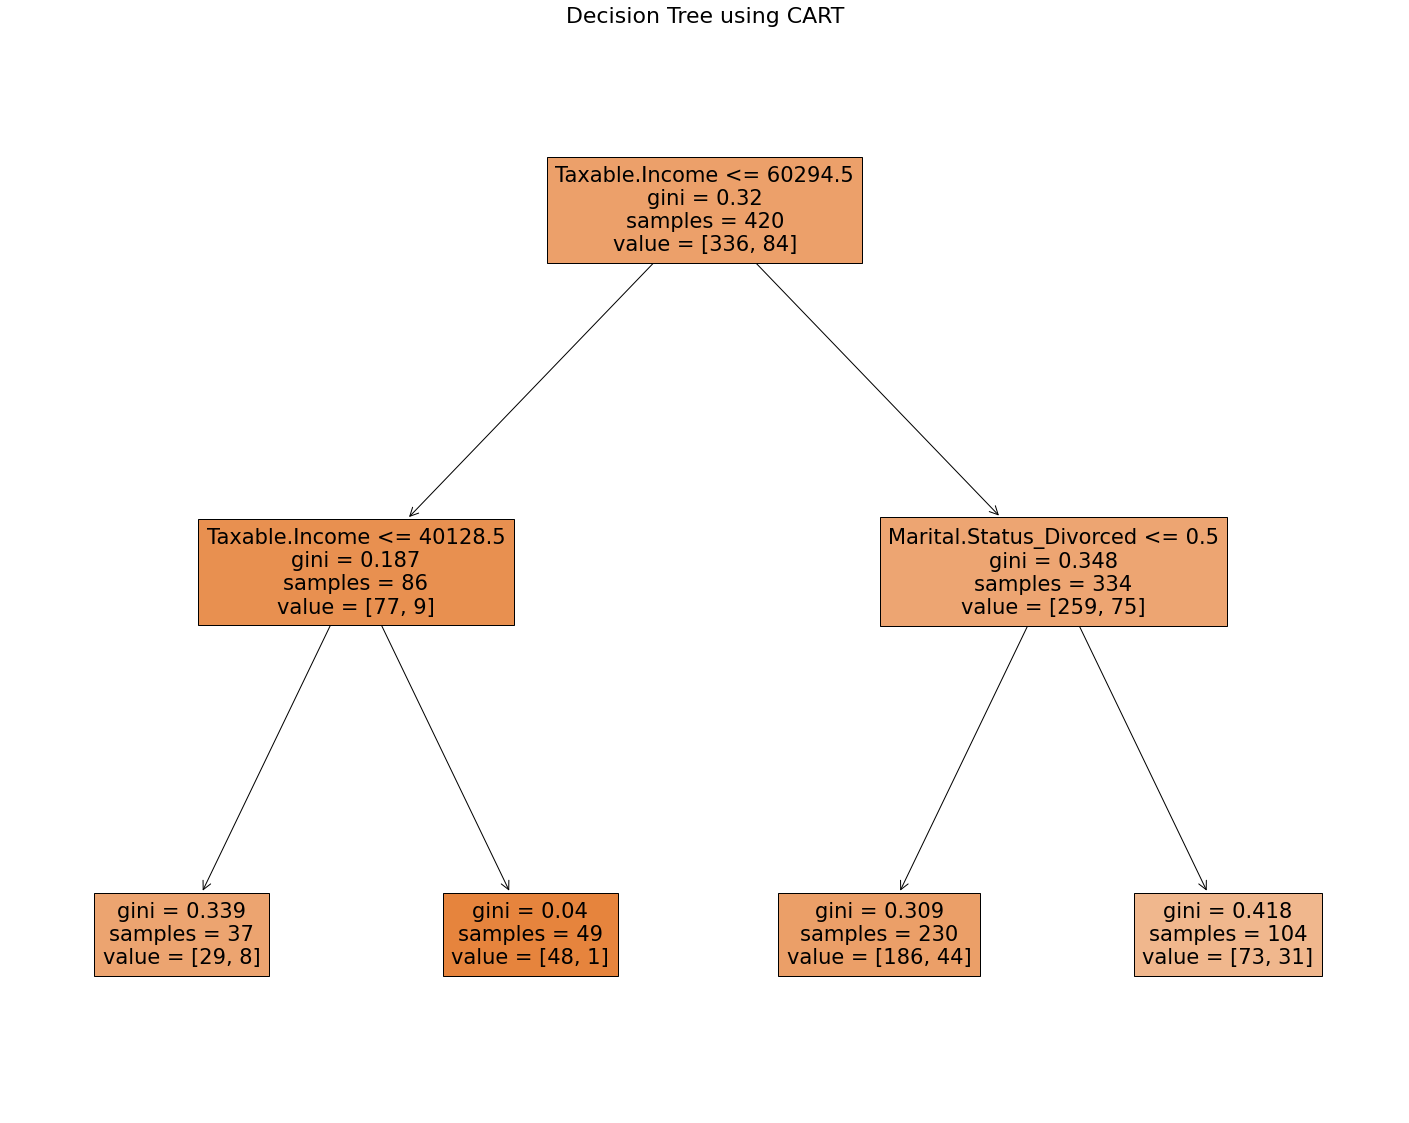

In [72]:

fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['Taxable.Income','City.Population','Work.Experience','Undergrad_NO',
                                     'Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married',
                                     'Marital.Status_Single','Urban_NO','Urban_YES','Category'], filled=True)
plt.title('Decision Tree using CART',fontsize=22)
plt.savefig('Fraud Check DT_CART.png')